In [61]:
%matplotlib inline

import numpy as np
import seaborn as sns
from pprint import pprint
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib

# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (10, 4))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

from dpm.emd import emd, make_distance_matrix


print("""
Generalizes:\n
https://github.com/vincentherrmann/wasserstein-notebook/blob/master/Wasserstein_Kantorovich.ipynb\n
https://vincentherrmann.github.io/blog/wasserstein/

to distributions of different sizes
""")


Generalizes:

https://github.com/vincentherrmann/wasserstein-notebook/blob/master/Wasserstein_Kantorovich.ipynb

https://vincentherrmann.github.io/blog/wasserstein/

to distributions of different sizes



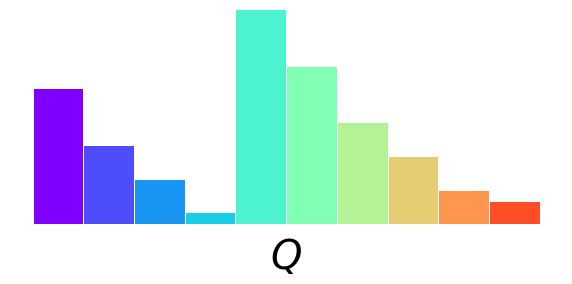

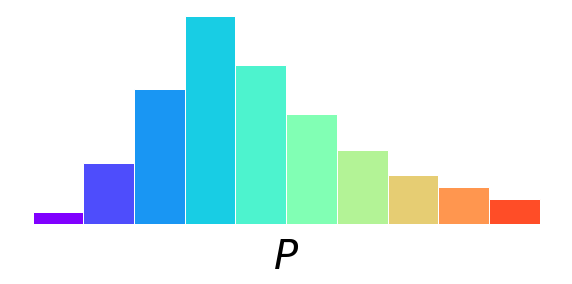

In [62]:
P_r = np.array([12,7,4,1,19,14,9,6,3,2])
P_t = np.array([1,5,11,17,13,9,6,4,3,2])

P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)

pr_len = len(P_r)
pt_len = len(P_t)

cNorm = colors.Normalize(vmin=0, vmax=pr_len)
colorMap = cm.ScalarMappable(norm=cNorm, cmap=cm.rainbow)
# fig, ax = plt.subplots(1, 2)


for i in range(pr_len):
	plt.bar(i, P_r[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
plt.title(r"$Q$", y=-0.23, x=0.5,
          fontweight=100, fontsize=40)
plt.axis('off')
plt.ylim(0, 0.25)
plt.savefig('../Presentations/divergences/assets/emd_hist_1.png', 
            bbox_inches='tight', dpi=300)
plt.show()

for i in range(pt_len):
	plt.bar(i, P_t[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
plt.title(r"$P$", y=-0.23, x=0.5,
          fontweight=100, fontsize=40)
plt.axis('off')
plt.ylim(0, 0.25)
plt.savefig('../Presentations/divergences/assets/emd_hist_2.png', 
            bbox_inches='tight', dpi=300)
plt.show()

In [63]:
emd_primal, gamma_primal = emd(P_r, P_t)
print("primal EMD:", emd_primal)

primal EMD: 0.7062374245472838


/usr/local/lib/python3.7/site-packages/scipy/optimize/_linprog_util.py:704: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


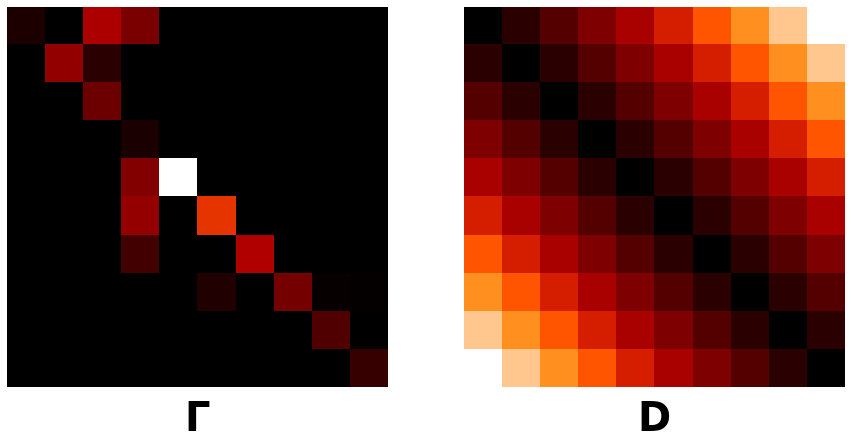

In [64]:
D = make_distance_matrix(len(P_r), len(P_t))
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0].imshow(gamma_primal, cmap=cm.gist_heat, interpolation='nearest')
ax[0].axis('off')
ax[0].set_title(r"$\mathbf{\Gamma}$", y=-0.13, fontsize=40)
ax[1].imshow(D, cmap=cm.gist_heat, interpolation='nearest')
ax[1].set_title(r"$\mathbf{D}$", y=-0.13, fontsize=40)
ax[1].axis('off')
plt.savefig('../Presentations/divergences/assets/transport_plan.png', 
            bbox_inches='tight', dpi=300)
plt.show()

In [65]:
emd_dual, (f, g) = emd(P_r, P_t, dual=True)
#print(dual_result)
print("dual EMD: ", emd_dual)

dual EMD:  0.7062374245472838


f: 
 [ 1.  0. -1. -2. -1.  0.  1.  2.  1.  0.]


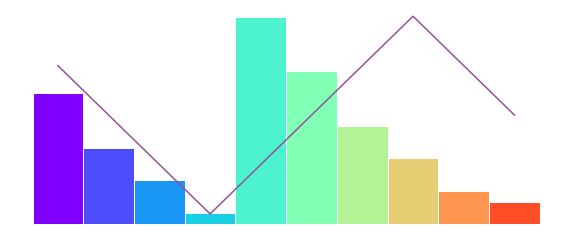

g: 
 [-1.  0.  1.  2.  1.  0. -1. -2. -1.  0.]


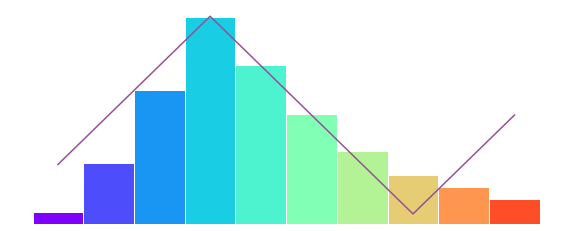

In [66]:
print("f: \n", f)
fig, ax1 = plt.subplots()
for i in range(pr_len):
	plt.bar(i, P_r[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
ax1.axis('off')
ax2=ax1.twinx()
ax2.axis('off')
ax2.plot(range(pr_len), f, color="#955196")
plt.show()


print("g: \n", g)
fig, ax1 = plt.subplots()
for i in range(pt_len):
	plt.bar(i, P_t[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
ax1.axis('off')
ax2=ax1.twinx()
ax2.axis('off')
ax2.plot(range(pt_len), g, color="#955196")
plt.show()

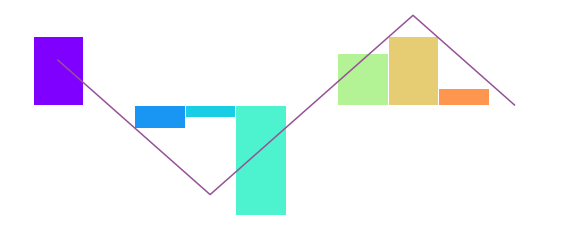

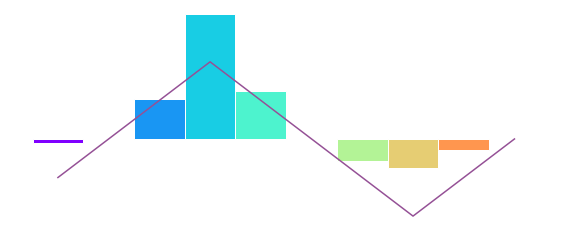

In [67]:
def align_yaxis(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:,1] / (extrema[:,1] - extrema[:,0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0,1] = extrema[0,0] + tot_span * (extrema[0,1] - extrema[0,0])
    extrema[1,0] = extrema[1,1] + tot_span * (extrema[1,0] - extrema[1,1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]

fig = plt.figure()
ax1 = fig.gca()
for i in range(pr_len):
	ax1.bar(i, P_r[i]*f[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
ax1.axis('off')
ax2=ax1.twinx()
ax2.plot(range(pr_len), f, color="#955196")
ax2.axis('off')
align_yaxis(ax1, ax2)
# plt.savefig("p_r_f-scaled.svg")
plt.show()

fig = plt.figure()
ax1 = fig.gca()
for i in range(pt_len):
	ax1.bar(i, P_t[i]*g[i], 1, color=colorMap.to_rgba(i), edgecolor="white", linewidth=1)
ax2=ax1.twinx()
ax2.plot(range(pt_len), g, color="#955196")
ax1.axis('off')
ax2.axis('off')
align_yaxis(ax1, ax2)
# plt.savefig("p_r_f-scaled.svg")
plt.show()



In [68]:
#check sum
emd_score = np.sum(np.multiply(P_r, f)) + np.sum(np.multiply(P_t, g))
print("emd: ", emd_score)

emd:  0.7062374245472836


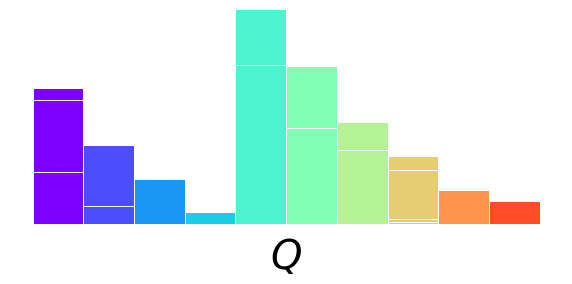

In [69]:
r = range(pr_len)

current_bottom = np.zeros(pr_len)

for i in range(pt_len).__reversed__():
	plt.bar(r, gamma_primal[r, i], 1, color=colorMap.to_rgba(r), bottom=current_bottom, 
            edgecolor="white", linewidth=1)
	current_bottom = current_bottom + gamma_primal[r, i]

plt.axis('off')
plt.ylim(0, 0.25)
plt.title(r"$Q$", y=-0.23, x=0.5,
          fontweight=100, fontsize=40)
plt.savefig('../Presentations/divergences/assets/earth_move_1.png', 
            bbox_inches='tight', dpi=300)
plt.show()

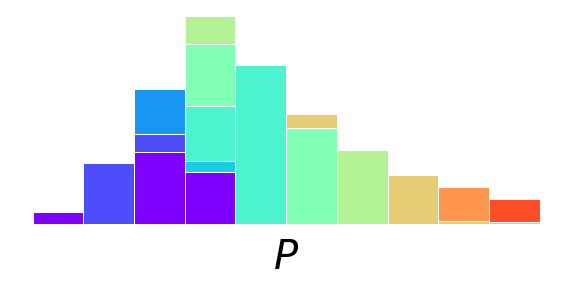

In [70]:
current_bottom = np.zeros(pt_len)
r = range(pt_len)

for i in range(pr_len):
	plt.bar(r, gamma_primal[i, r], 1, color=colorMap.to_rgba(i), bottom=current_bottom, 
            edgecolor="white", linewidth=1)
	current_bottom = current_bottom + gamma_primal[i, r]

plt.axis('off')
plt.ylim(0, 0.25)
plt.title(r"$P$", y=-0.23, x=0.5,
          fontweight=100, fontsize=40)
plt.savefig('../Presentations/divergences/assets/earth_move_2.png', 
            bbox_inches='tight', dpi=300)
plt.show()